In [1]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.array([[45, 3], [9, 12],
                 [15, 10], [60, 5],
                 [21, 15]])

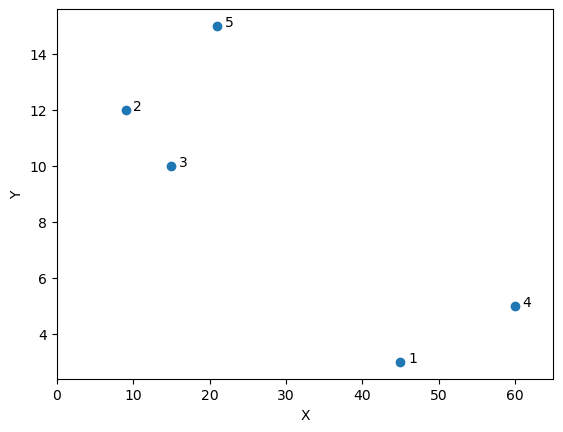

In [3]:
# 원데이터의 X, Y의 산포도
plt.scatter(data[:,0], data[:, 1])
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(0, 65)

# 행과 열의 수
rows, columns = data.shape
# 데이터 라벨
for i in range(rows):
    plt.annotate(i + 1, (data[i ,0]+1, data[i, 1]))

[[ 0.77521709 -1.35526185]
 [-1.08530393  0.67763093]
 [-0.77521709  0.22587698]
 [ 1.55043418 -0.9035079 ]
 [-0.46513025  1.35526185]]


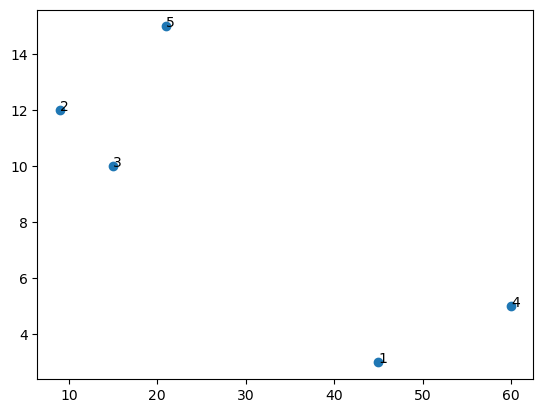

In [4]:
plt.scatter(data[:,0], data[:, 1])
# 행과 열의 수
rows, columns = data.shape
# 데이터 라벨
for i in range(rows):
    plt.annotate(i + 1, (data[i ,0], data[i, 1]))
# 데이터 표준화
scaler = StandardScaler()
scaler.fit(data)
data_std = scaler.transform(data)
print(data_std)

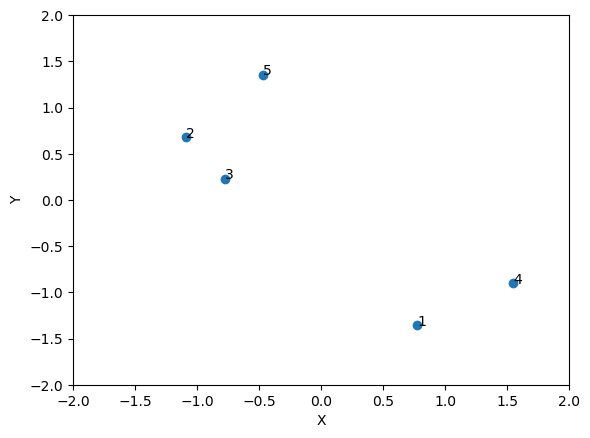

In [5]:
# 표준화된 데이터의 X, Y의 산포도
plt.scatter(data_std[:,0], data_std[:,1])

plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape
# 데이터 라벨
for i in range(rows):
    plt.annotate(i + 1, (data_std[i ,0], data_std[i, 1]))

In [6]:
# 군집의 수를 2개로 하는 군집화 객체
kmeans = KMeans(n_clusters=2, n_init=10)
# 2, 3열을 이용한
kmeans.fit(data_std)
# 군집 라벨
print(kmeans.labels_)
# 군집별 군집 중심
print(kmeans.cluster_centers_)

[0 1 1 0 1]
[[ 1.16282564 -1.12938488]
 [-0.77521709  0.75292325]]


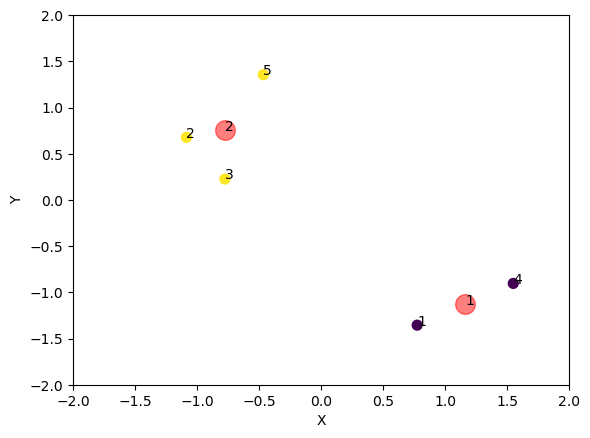

In [15]:
# 5. 결과 분석
# 군집 데이터 분포
plt.scatter(data_std[:,0], data_std[:,1], c=kmeans.labels_, s=50)
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim(-2, 2)
plt.ylim(-2, 2)

# 행과 열의 수
rows, columns = data_std.shape
# 데이터 라벨
for i in range(rows):
    plt.annotate(i + 1,(data_std[i,0], data_std[i,1]))

# 군집 중심 표시
plt.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            c='red', s=200, alpha=0.5)

# 군집 라벨
for k in range(0, len(kmeans.cluster_centers_)):
    plt.annotate(k + 1, (kmeans.cluster_centers_[k,0], kmeans.cluster_centers_[k,1]))

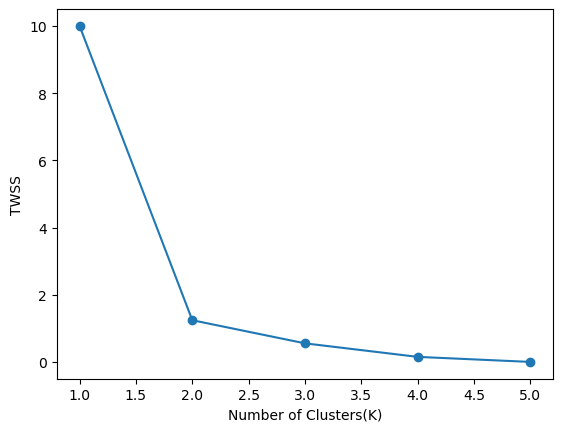

In [8]:
# 클러스터 수별 TWSS 값
TWSS = {}
# 군비 수 1~5까지 반복
for k in range(1,6):
    # 군집 수 설정과 군집화 객체 생성
    model = KMeans(n_clusters=k, n_init=10)
    # 표준화된 X, Y데이터에 대한 군집화
    model.fit(data_std)
    # 군집 수별 TWSS값 저장
    TWSS[k] = model.inertia_

# 군집 수에 따른 TWSS 그래프
plt.plot(list(TWSS.keys()),list(TWSS.values()), marker='o')
plt.xlabel("Number of Clusters(K)")
plt.ylabel("TWSS")
plt.show()